In [1]:
!python -m pip install tensorflow==2.9.1

* The following code demonstrated using Keras to build a deep learing model to solve classification problem on imdb data

In [2]:
# Load imdb dataset using Keras build-in function
from tensorflow.keras.datasets import imdb 
# Split training and testing set
# The argument num_words=1000 means you’ll only keep the top 1000 most frequently occurring words in the training data. Rare words will be discarded.
# The variables train_data and test_data are lists of reviews; each review is a list of word indices (encoding a sequence of words). train_labels and 
# test_labels are lists of 0s and 1s, where 0 stands for negative and 1 stands for positive.
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=1000)

# Print out the sizh and example of input data
# Note that the data has been pre-processed and the words are replaced by a word ID
print(train_data.shape)
print(train_labels.shape)
print(train_data[0])
print(train_labels[0])



2022-10-09 05:33:38.444320: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-09 05:33:38.444377: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


(25000,)
(25000,)
[1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
1


In [3]:
# You can’t directly feed lists of integers into a neural network. They all have different lengths, 
# but a neural network expects to process contiguous batches of data. You can transform it into a multi-hot vector using following function.
import numpy as np
def vectorize_sequence(sequences, dimension=1000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i,j] = 1.
    return results

train_data = vectorize_sequence(train_data)
test_data = vectorize_sequence(test_data)


In [4]:
# Import package for building models in Keras
from tensorflow import keras 
from tensorflow.keras import layers 

# Building a three-layer model to solve the problem
# The first argument passed to each Dense layer is the number of units in the layer: the dimensionality of the representation space of the layer.
model = keras.Sequential([
layers.Dense(16, activation="relu"), 
layers.Dense(16, activation="relu"), 
layers.Dense(1, activation="sigmoid")])


2022-10-09 05:33:45.107243: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-10-09 05:33:45.107278: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-09 05:33:45.107297: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (publicserver): /proc/driver/nvidia/version does not exist
2022-10-09 05:33:45.107523: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
# Compile the model by provding optimizer, loss and the metrics to track. rmsprop optimizaer is usually a good default choice for virtually any problem.
# Since the problem is a binary classification problem and the output of your model is a probability (model ends with sigmoid activation). It’s best to use the binary_crossentropy loss. 
model.compile(optimizer="rmsprop", 
loss="binary_crossentropy", 
metrics=["accuracy"])


In [6]:
# To track the performance of the model during training, you can manually spilit a validation data here. 
x_val = train_data[:10000] 
partial_x_train = train_data[10000:] 
y_val = train_labels[:10000] 
partial_y_train = train_labels[10000:]

# Feed data into the model
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/20
469/469 [==============================] - 2s 2ms/step - loss: 0.4285 - accuracy: 0.8034 - val_loss: 0.3435 - val_accuracy: 0.8536
Epoch 2/20
469/469 [==============================] - 1s 2ms/step - loss: 0.3259 - accuracy: 0.8654 - val_loss: 0.3319 - val_accuracy: 0.8606
Epoch 3/20
469/469 [==============================] - 1s 2ms/step - loss: 0.3077 - accuracy: 0.8720 - val_loss: 0.3369 - val_accuracy: 0.8591
Epoch 4/20
469/469 [==============================] - 1s 2ms/step - loss: 0.2939 - accuracy: 0.8774 - val_loss: 0.3485 - val_accuracy: 0.8596
Epoch 5/20
469/469 [==============================] - 1s 2ms/step - loss: 0.2799 - accuracy: 0.8857 - val_loss: 0.3497 - val_accuracy: 0.8578
Epoch 6/20
469/469 [==============================] - 1s 2ms/step - loss: 0.2627 - accuracy: 0.8968 - val_loss: 0.3621 - val_accuracy: 0.8530
Epoch 7/20
469/469 [==============================] - 1s 2ms/step - loss: 0.2469 - accuracy: 0.9055 - val_loss: 0.3778 - val_accuracy: 0.8512
Epoch 

In [7]:
# list all data in history
print(history.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


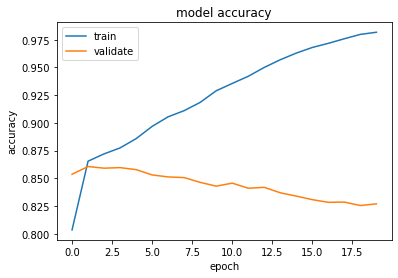

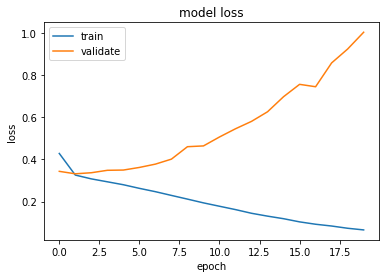

In [8]:
# plot the loss and accuracy in the history
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()


In [9]:
# After having trained a model, you can predict the classification of reviews on test data or other new data. The function is pretty like scikit-learn style
predict_result = model.predict(test_data) 
print(predict_result.shape)
print(predict_result[:5])

# Or you can evaluate the model using evaluate function
evaluation_result = model.evaluate(test_data, test_labels)
# print out the evaluation result on the corrsponding metrics
print(model.metrics_names)
print(evaluation_result)


782/782 [==============================] - 1s 743us/step
(25000, 1)
[[0.02268844]
 [1.        ]
 [0.9988071 ]
 [0.99999136]
 [0.99997824]]
782/782 [==============================] - 1s 895us/step - loss: 0.9827 - accuracy: 0.8200
['loss', 'accuracy']
[0.9826968908309937, 0.8199599981307983]


* The following example will cover the regression problem. 

In [10]:
# Similarly, load the boston_housing data using Keras build-in function
from tensorflow.keras.datasets import boston_housing 
(train_data, train_targets), (test_data, test_targets) = (boston_housing.load_data())

# Print out the sizh and example of input data
print(train_data.shape)
print(train_targets.shape)
print(train_data[0])
print(train_targets[0])


(404, 13)
(404,)
[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
15.2


In [11]:
# Perform feature-wise normalization
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(train_data)
train_data = mms.transform(train_data)
test_data = mms.transform(test_data)

# Print out the sizh and example of input data
print(train_data.shape)
print(train_targets.shape)
print(train_data[0])
print(train_targets[0])


(404, 13)
(404,)
[0.01378163 0.         0.28152493 0.         0.31481481 0.49980635
 0.91452111 0.29719123 0.13043478 0.22753346 0.89361702 1.
 0.46881898]
15.2


In [12]:
# Building a three-layer model to solve the problem
model = keras.Sequential([
layers.Dense(64, activation="relu"), 
layers.Dense(64, activation="relu"), 
layers.Dense(1) ]) 
# Compile the model with rmsprop as optimizer and use MSE as loss. When building the model, also track MAE as an extra metrics.
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"]) 



In [13]:
# To track the performance of the model during training, you can manually spilit a validation data here. 
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(train_data, train_targets, test_size = 0.20)

# Feed data into the model
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_val, y_val))


Epoch 1/50
11/11 [==============================] - 1s 13ms/step - loss: 542.3476 - mae: 21.4455 - val_loss: 481.8300 - val_mae: 19.5191
Epoch 2/50
11/11 [==============================] - 0s 4ms/step - loss: 455.3653 - mae: 19.2154 - val_loss: 394.3622 - val_mae: 17.0360
Epoch 3/50
11/11 [==============================] - 0s 4ms/step - loss: 361.3782 - mae: 16.5565 - val_loss: 295.6888 - val_mae: 13.6944
Epoch 4/50
11/11 [==============================] - 0s 4ms/step - loss: 263.8712 - mae: 13.3282 - val_loss: 211.1976 - val_mae: 11.1019
Epoch 5/50
11/11 [==============================] - 0s 3ms/step - loss: 186.6197 - mae: 10.5609 - val_loss: 159.2596 - val_mae: 9.6424
Epoch 6/50
11/11 [==============================] - 0s 3ms/step - loss: 141.1013 - mae: 9.0489 - val_loss: 130.1645 - val_mae: 8.7227
Epoch 7/50
11/11 [==============================] - 0s 4ms/step - loss: 116.3456 - mae: 8.1792 - val_loss: 118.9950 - val_mae: 8.1842
Epoch 8/50
11/11 [==============================] - 

In [14]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


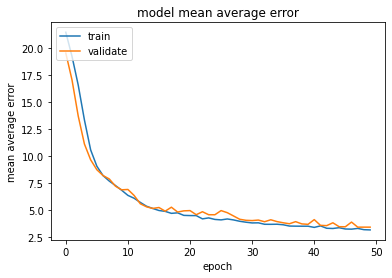

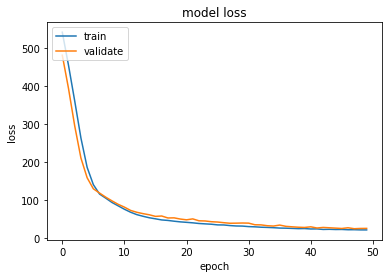

In [15]:
# plot the loss and accuracy in the history
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('model mean average error')
plt.ylabel('mean average error')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()

In [16]:
# After having trained a model, you can predict the classification of reviews on test data or other new data. The function is pretty like scikit-learn style
predict_result = model.predict(test_data) 
print(predict_result.shape)
print(predict_result[:5])

# Or you can evaluate the model using evaluate function
evaluation_result = model.evaluate(test_data, test_targets)
# print out the evaluation result on the corrsponding metrics
print(model.metrics_names)
print(evaluation_result)


4/4 [==============================] - 0s 2ms/step
(102, 1)
[[ 8.627609]
 [18.393309]
 [19.951834]
 [32.50511 ]
 [22.674633]]
4/4 [==============================] - 0s 1ms/step - loss: 25.1670 - mae: 3.6118
['loss', 'mae']
[25.166976928710938, 3.611806869506836]
